In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
human_data = pd.read_table('../Datasets/human_dataset.txt')
labels = human_data['class'].to_numpy()
dna_spectral_representation = np.load('../DNA Vector Representations/human_dataset_dna_vector.npy')
print(dna_spectral_representation.shape)
print(labels.shape)

(4380, 1024)
(4380,)


In [3]:
X_train_full, X_test, y_train_full, y_test = train_test_split(dna_spectral_representation, labels, test_size = 0.2,
                                                             random_state=20)

# Model : LeNet5 like Architecture CNN for Text Classification

In [4]:
model = keras.Sequential()

model.add(keras.layers.Conv1D(filters=30, kernel_size=(5), activation='relu', input_shape=(1024,1),padding="same"))
model.add(keras.layers.MaxPooling1D())

model.add(keras.layers.Conv1D(filters=15, kernel_size=(5), activation='relu', input_shape=(512,1),padding="same"))
model.add(keras.layers.MaxPooling1D())

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=256, activation='relu'))

model.add(keras.layers.Dense(units=128, activation='relu'))

model.add(keras.layers.Dense(units=64, activation='relu'))

model.add(keras.layers.Dense(units=7, activation = 'softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1024, 30)          180       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 512, 30)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 512, 15)           2265      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 256, 15)          0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 3840)              0         
                                                                 
 dense (Dense)               (None, 256)               9

In [6]:
opt = keras.optimizers.SGD(learning_rate=0.045,momentum = 0.0)
model.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

In [7]:
X_train , X_valid , y_train ,y_valid = train_test_split(dna_spectral_representation, labels, test_size = 0.1,
                                                        random_state=20)

In [8]:
earlyStop = keras.callbacks.EarlyStopping(monitor='loss', patience=1 , mode="min")
# class_weight = {0 : 0.121233,
#                 1 : 0.121918,
#                 2 : 0.079680,
#                 3 : 0.153425,
#                 4 : 0.162329,
#                 5 : 0.054795,
#                 6 : 0.306621}
# class_weight = class_weight,
history = model.fit(X_train, y_train, epochs=7 ,validation_data=(X_valid, y_valid),
                    batch_size = 32 , callbacks = [earlyStop])

Epoch 1/7
124/124 [==============================] - 3s 23ms/step - loss: 1.6776 - accuracy: 0.3803 - val_loss: 1.6097 - val_accuracy: 0.3676
Epoch 2/7
124/124 [==============================] - 3s 21ms/step - loss: 1.2296 - accuracy: 0.5708 - val_loss: 0.9668 - val_accuracy: 0.6507
Epoch 3/7
124/124 [==============================] - 3s 25ms/step - loss: 0.8363 - accuracy: 0.7210 - val_loss: 0.7737 - val_accuracy: 0.7260
Epoch 4/7
124/124 [==============================] - 4s 32ms/step - loss: 0.5520 - accuracy: 0.8148 - val_loss: 0.6658 - val_accuracy: 0.7945
Epoch 5/7
124/124 [==============================] - 4s 30ms/step - loss: 0.3086 - accuracy: 0.9036 - val_loss: 0.6908 - val_accuracy: 0.7763
Epoch 6/7
124/124 [==============================] - 4s 29ms/step - loss: 0.2360 - accuracy: 0.9307 - val_loss: 0.6499 - val_accuracy: 0.7831
Epoch 7/7
124/124 [==============================] - 4s 30ms/step - loss: 0.3169 - accuracy: 0.9135 - val_loss: 0.5650 - val_accuracy: 0.8425


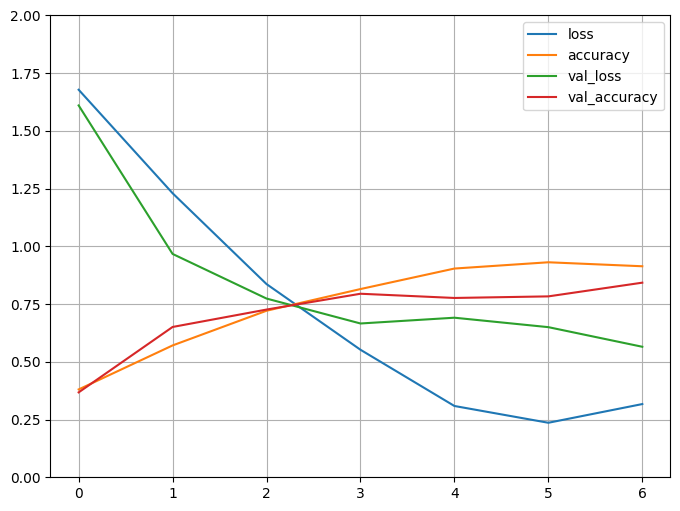

In [9]:
pd.DataFrame(history.history).plot(figsize=(8, 6))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In [10]:
model.save("model")
print("Saved model to disk")

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


Saved model to disk
